In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
file_path = r"C:\\Users\\sahil\\Desktop\\NLP\\hindi_tokenized_words2.csv"
df = pd.read_csv(file_path, header=None)

In [8]:
df.head(50)

,0
0,token
1,इनेलो
2,1987
3,में
4,उस
5,वक्त
6,ऐसे
7,ही
8,दोराहे
9,पर


In [4]:

words = [w.strip() for w in df[0] if isinstance(w, str) and w != "token"]


In [5]:
print(words[:20])
print("Total words:", len(words))

['इनेलो', '1987', 'में', 'उस', 'वक्त', 'ऐसे', 'ही', 'दोराहे', 'पर', 'खड़ी', 'थी', ',', 'जब', 'पूर्व', 'उपप्रधानमंत्री', 'देवीलाल', 'ने', 'अपने', 'पुत्र', 'ओमप्रकाश']
Total words: 190001325


In [6]:
freq_dict = {}
for w in words:
    freq_dict[w] = freq_dict.get(w, 0) + 1

sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

Top 100 words: [('।', 7822780), ('के', 7219078), ('में', 5487609), ('है', 4756799), ('की', 4381333), (',', 3559961), ('को', 3360582), ('से', 3178537), ('ने', 2451154), ('का', 2341777), ('और', 2268064), ('.', 2265823), ('पर', 1973308), ('हैं', 1777176), ('कि', 1709379), ('भी', 1338879), ('लिए', 1135350), ('-', 1123570), ('एक', 1117381), ('कर', 1006043), ('इस', 985225), ('नहीं', 962150), ('किया', 899408), ('ही', 844615), ('गया', 832130), ('हो', 802309), ('था', 713750), ('कहा', 690312), ('करने', 647175), ('साथ', 636622), ('यह', 602496), ('तो', 591673), ('बाद', 579228), ('दिया', 504029), ('रहे', 500864), ('गई', 485739), ('रहा', 464069), ('तक', 454667), ('हुए', 443717), ('रही', 431823), ('अपने', 426938), ('जा', 416823), ('थी', 408483), ('उन्होंने', 375527), ('पुलिस', 364508), ('लोगों', 361383), ('थे', 361049), ('लेकिन', 345722), ('गए', 343587), ("'", 334312), ('व', 332392), ('होने', 326911), ('पहले', 319833), ('दी', 319612), ('बताया', 319337), ('इसके', 317788), ('सरकार', 311501), ('जो', 311

c:\Users\sahil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2404 (\N{DEVANAGARI DANDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sahil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sahil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sahil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2375 (\N{DEVANAGARI VOWEL SIGN E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sahil\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2350 (\N{DEVANAGARI LETTER MA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\U

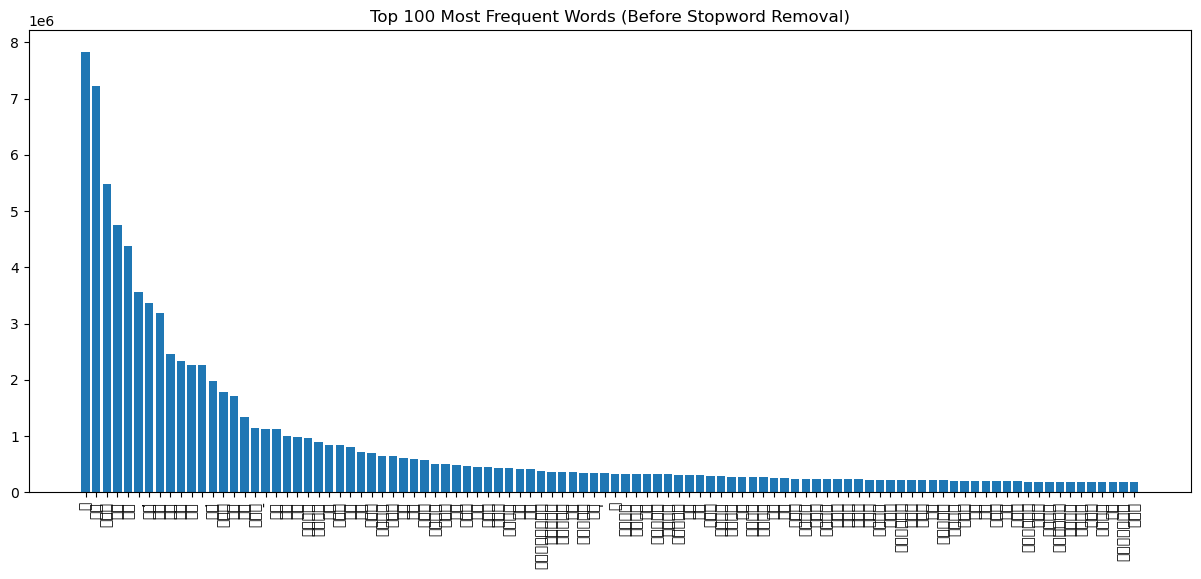

In [7]:
top_100 = sorted_freq[:100]
print("Top 100 words:", top_100)
plt.figure(figsize=(15,6))
plt.bar([w for w,f in top_100], [f for w,f in top_100])
plt.xticks(rotation=90)
plt.title("Top 100 Most Frequent Words (Before Stopword Removal)")
plt.show()


In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams, font_manager


hindi_font = None
for f in font_manager.findSystemFonts(fontpaths=None, fontext='ttf'):
    if "Mangal" in f or "NotoSansDevanagari" in f:
        hindi_font = f
        break

if hindi_font:
    rcParams['font.family'] = font_manager.FontProperties(fname=hindi_font).get_name()
else:
    print("⚠️ Hindi font not found. Please install 'Mangal' (Windows) or 'Noto Sans Devanagari'.")

def plot_top_words(freq_dict, threshold, top_n=50):
    stopwords = {w for w, f in freq_dict.items() if f > threshold}
    filtered = [(w, f) for w, f in freq_dict.items() if w not in stopwords]

    sorted_freq = sorted(filtered, key=lambda x: x[1], reverse=True)[:top_n]

    if not sorted_freq:
        print(f"No words left after filtering with threshold {threshold}")
        return

    words, freqs = zip(*sorted_freq)
    plt.figure(figsize=(15, 6))
    plt.bar(words, freqs)
    plt.xticks(rotation=90, fontsize=10)
    plt.title(f"Top {top_n} Words After Removing Stopwords (Threshold={threshold})", fontsize=12)
    plt.xlabel("शब्द (Words)")
    plt.ylabel("आवृत्ति (Frequency)")
    plt.tight_layout()
    plt.show()


# Example usage
thresholds = [800000, 500000, 200000, 100000, 50000, 20000, 10000, 5000, 1000, 500, 100]
for threshold in thresholds:
    plot_top_words(freq_dict, threshold, top_n=50)


NameError: name 'freq_dict' is not defined